In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

EDA

In [19]:
fraud=pd.read_csv("/content/sample_data/Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [20]:
fraud=fraud.rename({'Marital.Status':'Marital_Status',
                    'Taxable.Income':'Taxable_Income',
                    'City.Population':'City_Population',
                    'Work.Experience':'Work_Experience'},axis=1)

In [21]:
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [22]:
fraud_temp=fraud
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [23]:
fraud_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable_Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City_Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work_Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


**********Taxable_Income********


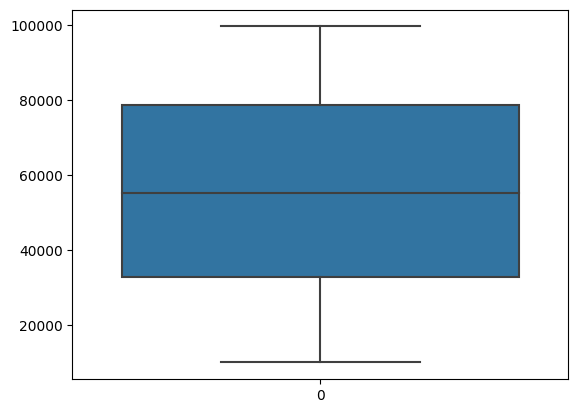

**********City_Population********


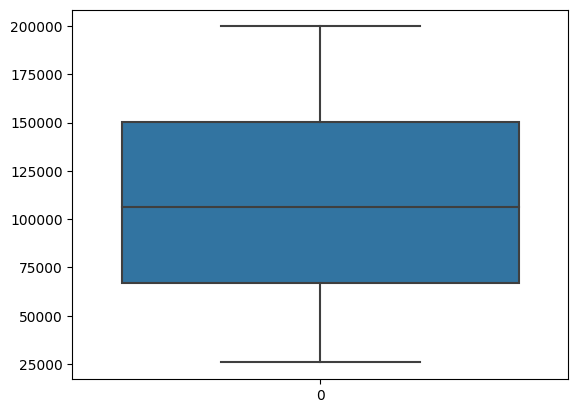

**********Work_Experience********


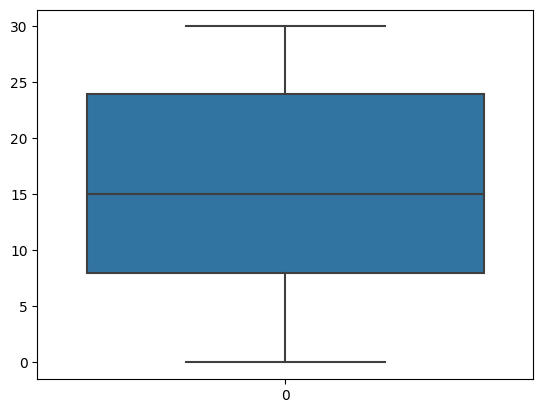

In [25]:
for features in fraud_temp.columns:
  if fraud_temp[features].dtype!='object':
    print("**********{}********".format(features))
    sns.boxplot(fraud_temp[features])
    plt.show()

In [26]:
fraud_temp.shape

(600, 6)

In [27]:
for features in fraud_temp.columns:
  if fraud_temp[features].dtype=='object':
    fraud_temp[features]=pd.Categorical(fraud_temp[features])

fraud_temp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    category
 1   Marital_Status   600 non-null    category
 2   Taxable_Income   600 non-null    int64   
 3   City_Population  600 non-null    int64   
 4   Work_Experience  600 non-null    int64   
 5   Urban            600 non-null    category
dtypes: category(3), int64(3)
memory usage: 16.3 KB


In [28]:
print(fraud_temp['Undergrad'].value_counts())
print("**************************************")
print(fraud_temp['Marital_Status'].value_counts())
print("**************************************")

YES    312
NO     288
Name: Undergrad, dtype: int64
**************************************
Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64
**************************************


lets split our data into target and independent variable

In [57]:
y=fraud_temp[['Taxable_Income']]

In [58]:
#risky=1 good =0
y=np.where(y.Taxable_Income>=30000,0,1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
x=fraud_temp.drop('Taxable_Income',axis=1)
oneHotCols=["Undergrad","Marital_Status","Urban"]
x=pd.get_dummies(x,columns=oneHotCols)
x.head()

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
x_train.shape,x_test.shape

((480, 9), (120, 9))

In [61]:
y_train.shape,y_test.shape

((480,), (120,))

In [62]:
for feature in range(2,8):
  model=RandomForestClassifier(n_estimators=100,criterion='gini',bootstrap=True,max_depth=depth,max_features=feature)
  model.fit(x_train,y_train)
  print("*****feature {}***********".format(feature))
  print(model.score(x_train,y_train)*100)
  print(model.score(x_test,y_test)*100)

*****feature 2***********
79.79166666666667
78.33333333333333
*****feature 3***********
79.79166666666667
78.33333333333333
*****feature 4***********
80.0
78.33333333333333
*****feature 5***********
79.79166666666667
78.33333333333333
*****feature 6***********
80.20833333333334
78.33333333333333
*****feature 7***********
80.20833333333334
78.33333333333333


In [68]:
for feature in range(2,8):
  model=RandomForestClassifier(n_estimators=400,criterion='gini',bootstrap=True,max_depth=5,max_features=feature)
  model.fit(x_train,y_train)
  print("*****feature {}***********".format(feature))
  print(model.score(x_train,y_train)*100)
  print(model.score(x_test,y_test)*100)

*****feature 2***********
79.79166666666667
78.33333333333333
*****feature 3***********
79.79166666666667
78.33333333333333
*****feature 4***********
80.0
78.33333333333333
*****feature 5***********
79.79166666666667
78.33333333333333
*****feature 6***********
80.20833333333334
78.33333333333333
*****feature 7***********
79.79166666666667
78.33333333333333


In [66]:
num_tree=400
list=[]
for i in range(2,8):
  max_feature=11
  kfold=KFold(n_splits=10,random_state=7,shuffle=True)
  model=RandomForestClassifier(n_estimators=num_tree,max_depth=3,max_features=i)
  result=cross_val_score(model,x,y,cv=kfold)
  list.append(result.mean()*100)

In [67]:
(sum(list)/len(list))

79.33333333333333